In [34]:
import matplotlib.pyplot as plt
import numpy as np
from wrf import to_np, getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
from metpy.plots import colortables
from matplotlib import path
import geopandas as gpd
import shapely
from matplotlib.patches import Polygon
#import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patches as patches
from descartes import PolygonPatch
from scipy.ndimage import gaussian_filter

In [35]:
#open basemap proj

file12_wrf_d02 = "/glade/scratch/molina/wrfout_d01_2017-01-21_09:00:00"
ncfile12_wrf_d02 = Dataset(file12_wrf_d02)
bleh = getvar(ncfile12_wrf_d02,"td2")
lats4, lons4 = latlon_coords(bleh)
bm = get_basemap(bleh)
x, y = bm(to_np(lons4), to_np(lats4))

#gom basin region

patches_gom = []
can = gpd.GeoDataFrame.from_file("/glade/work/molina/DATA/ocean_shapefiles/World_Seas_WGS84.shp")
gom = can[can['NAME']=='Gulf of Mexico']
studyarea = shapely.geometry.box(bm.llcrnrlon, bm.llcrnrlat, 
                                 bm.urcrnrlon, bm.urcrnrlat)
selection = gom[gom.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_gom.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_gom.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')

In [36]:
###AVAILABLE VARIABLES
#td2	2m Dew Point Temperature
#slp	Sea Level Pressure
#rh2	2m Relative Humidity
#td2	2m Dew Point Temperature
#helicity	Storm Relative Helicity
#eth/theta_e	Equivalent Potential Temperature
#cape_2d	2D CAPE (MCAPE/MCIN/LCL/LFC)


####################################################################################

var = "td2"

time = "2017-01-21_09:00:00"

cmap = 'BrBG'

####################################################################################


#orig
ncfile_wrf_d02 = Dataset(f"/glade/scratch/molina/wrfout_d01_{time}")
while True:
    dbz_wrf_d02 = np.array([0])
    if len(dbz_wrf_d02) == 1:
        try: 
            dbz_wrf_d02 = getvar(ncfile_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz_wrf_d02) != 1:
        print('WRF File Opened...')
        break


#perturb
ncfile1_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_muregion_cool_2/wrfout_d01_{time}")
while True:
    dbz1_wrf_d02 = np.array([0])
    if len(dbz1_wrf_d02) == 1:
        try: 
            dbz1_wrf_d02 = getvar(ncfile1_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz1_wrf_d02) != 1:
        print('WRF File1 Opened...')
        break


ncfile2_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_muregion_cool_1/wrfout_d01_{time}")
while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('WRF File2 Opened...')
        break
    
    
ncfile3_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_muregion_warm_1/wrfout_d01_{time}")
while True:
    dbz3_wrf_d02 = np.array([0])
    if len(dbz3_wrf_d02) == 1:
        try: 
            dbz3_wrf_d02 = getvar(ncfile3_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz3_wrf_d02) != 1:
        print('WRF File3 Opened...')
        break

    
ncfile4_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_muregion_warm_2/wrfout_d01_{time}")
while True:
    dbz4_wrf_d02 = np.array([0])
    if len(dbz4_wrf_d02) == 1:
        try: 
            dbz4_wrf_d02 = getvar(ncfile4_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz4_wrf_d02) != 1:
        print('WRF File4 Opened...')
        break
    
    
ncfile5_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gomplume_cool_2/wrfout_d01_{time}")
while True:
    dbz5_wrf_d02 = np.array([0])
    if len(dbz5_wrf_d02) == 1:
        try: 
            dbz5_wrf_d02 = getvar(ncfile5_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz5_wrf_d02) != 1:
        print('WRF File5 Opened...')
        break
    
    
ncfile6_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gomplume_cool_1/wrfout_d01_{time}")
while True:
    dbz6_wrf_d02 = np.array([0])
    if len(dbz6_wrf_d02) == 1:
        try: 
            dbz6_wrf_d02 = getvar(ncfile6_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz6_wrf_d02) != 1:
        print('WRF File6 Opened...')
        break


ncfile7_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gomplume_warm_1/wrfout_d01_{time}")
while True:
    dbz7_wrf_d02 = np.array([0])
    if len(dbz7_wrf_d02) == 1:
        try: 
            dbz7_wrf_d02 = getvar(ncfile7_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz7_wrf_d02) != 1:
        print('WRF File7 Opened...')
        break
    

ncfile8_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gomplume_warm_2/wrfout_d01_{time}")
while True:
    dbz8_wrf_d02 = np.array([0])
    if len(dbz8_wrf_d02) == 1:
        try: 
            dbz8_wrf_d02 = getvar(ncfile8_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz8_wrf_d02) != 1:
        print('WRF File8 Opened...')
        break
    

ncfile9_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gombasin_cool_2/wrfout_d01_{time}")
while True:
    dbz9_wrf_d02 = np.array([0])
    if len(dbz9_wrf_d02) == 1:
        try: 
            dbz9_wrf_d02 = getvar(ncfile9_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz9_wrf_d02) != 1:
        print('WRF File9 Opened...')
        break
        
        
ncfile10_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gombasin_cool_1/wrfout_d01_{time}")
while True:
    dbz10_wrf_d02 = np.array([0])
    if len(dbz10_wrf_d02) == 1:
        try: 
            dbz10_wrf_d02 = getvar(ncfile10_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz10_wrf_d02) != 1:
        print('WRF File10 Opened...')
        break
        
        
ncfile11_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gombasin_warm_1/wrfout_d01_{time}")
while True:
    dbz11_wrf_d02 = np.array([0])
    if len(dbz11_wrf_d02) == 1:
        try: 
            dbz11_wrf_d02 = getvar(ncfile11_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz11_wrf_d02) != 1:
        print('WRF File11 Opened...')
        break
        
        
ncfile12_wrf_d02 = Dataset(f"/glade/scratch/molina/wrf4km_sst_gombasin_warm_2/wrfout_d01_{time}")
while True:
    dbz12_wrf_d02 = np.array([0])
    if len(dbz12_wrf_d02) == 1:
        try: 
            dbz12_wrf_d02 = getvar(ncfile12_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz12_wrf_d02) != 1:
        print('WRF File12 Opened...')
        break

WRF File Opened...
WRF File1 Opened...
WRF File2 Opened...
WRF File3 Opened...
WRF File4 Opened...
WRF File5 Opened...
WRF File6 Opened...
WRF File7 Opened...
WRF File8 Opened...
WRF File9 Opened...
WRF File10 Opened...
WRF File11 Opened...
WRF File12 Opened...


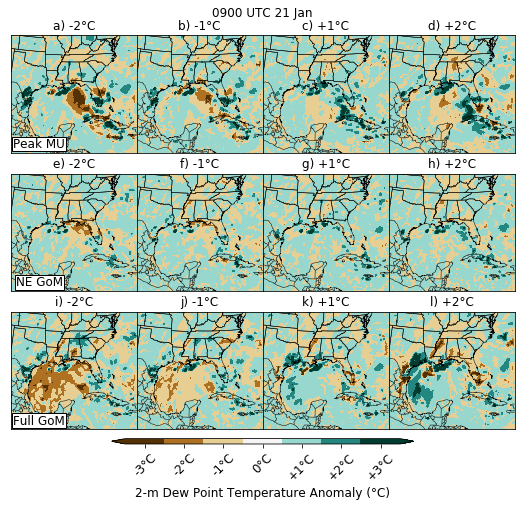

In [38]:
vmin=-3
vmax=3

cmap = plt.cm.get_cmap('BrBG', 7)

levels = [-3,-2,-1,0,1,2,3]

smoother=2.0

#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(7.,6.))

#fig.suptitle(f'{time}', x=0, y=1.0, fontsize=12)

fig.suptitle(f'0900 UTC 21 Jan', x=0.5, y=1.0275, fontsize=12)

a = u"\u00b0"

##############################################################################  


ax1 = fig.add_axes([0.0, 0.66, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12)

ax1.text(0.225, 0.075, 'Peak MU', fontsize=12, 
         horizontalalignment='center', verticalalignment='center', 
         transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', pad=1.0))

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz1_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother), 
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax2 = fig.add_axes([0.25, 0.66, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz2_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax3 = fig.add_axes([0.5, 0.66, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz3_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax4 = fig.add_axes([0.75, 0.66, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz4_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax5 = fig.add_axes([0., 0.34, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

ax5.text(0.225, 0.075, 'NE GoM', fontsize=12, 
         horizontalalignment='center', verticalalignment='center', 
         transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', pad=1.0))

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz5_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax6 = fig.add_axes([0.25, 0.34, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz6_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax7 = fig.add_axes([0.5, 0.34, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz7_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax8 = fig.add_axes([0.75, 0.34, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz8_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax9 = fig.add_axes([0., 0.02, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)

ax9.text(0.225, 0.075, 'Full GoM', fontsize=12,
         horizontalalignment='center', verticalalignment='center', 
         transform=ax9.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', pad=1.0))

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz9_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates() 


##############################################################################  


ax10 = fig.add_axes([0.25, 0.02, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz10_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax11 = fig.add_axes([0.5, 0.02, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz11_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax12 = fig.add_axes([0.75, 0.02, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, gaussian_filter(to_np(dbz12_wrf_d02)[:,:]-to_np(dbz_wrf_d02)[:,:], smoother),
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


#ax13 = fig.add_axes([-0.09, 0.811, 0.15, 0.15])

#ax13.text(0., 0., "Control Run", fontsize=10, zorder=40, transform=ax13.transAxes,
#         bbox={'facecolor':'w', 'pad':1})

#wspd_contours = bm.pcolormesh(x, y, to_np(dbz_wrf_d02)[:,:],
#                              cmap=cmap, vmin=vmin, vmax=vmax, zorder=30)

#bm.drawcoastlines(linewidth=0.5, zorder=40)
#bm.drawcountries(zorder=40)
#bm.drawstates(zorder=40)

##############################################################################  


import matplotlib as mpl

cbar_ax = fig.add_axes([0.2, 0.015, 0.6, 0.0125])

cmap = plt.cm.get_cmap('BrBG', 7)

norm = mpl.colors.Normalize(vmin=0, vmax=7)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=[0,1,2,3,4,5,6,7],
                                extend='both')

cb1.set_label('2-m Dew Point Temperature Anomaly ('+a+'C)', fontsize=12)

labels = np.arange(0,7,1)
loc    = labels + .5
cb1.set_ticks(loc)

cb1.ax.set_xticklabels(['-3'+a+'C','-2'+a+'C','-1'+a+'C','0'+a+'C',
                        '+1'+a+'C','+2'+a+'C','+3'+a+'C'],rotation=45)

cb1.ax.tick_params(labelsize=12)


##############################################################################  


#plt.savefig(f'/glade/work/molina/DATA/temp_figs/mwr2019_fig13.png', bbox_inches='tight', pad_inches=0.075, dpi=1200)
#plt.savefig(f'/glade/work/molina/DATA/temp_figs/mwr2019_fig13_lowdpi.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
plt.show()
plt.close()


##############################################################################  
##############################################################################  
##############################################################################  

In [19]:
###AVAILABLE VARIABLES
#td2	2m Dew Point Temperature
#slp	Sea Level Pressure
#rh2	2m Relative Humidity
#helicity	Storm Relative Helicity
#eth/theta_e	Equivalent Potential Temperature
#cape_2d	2D CAPE (MCAPE/MCIN/LCL/LFC)


####################################################################################

var = "cape_2d"

time = "2017-01-21_09:00:00"

cmap = 'seismic'

####################################################################################


#orig
ncfile_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_ens_2/wrfout_d01_{time}")
while True:
    dbz_wrf_d02 = np.array([0])
    if len(dbz_wrf_d02) == 1:
        try: 
            dbz_wrf_d02 = getvar(ncfile_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz_wrf_d02) != 1:
        print('WRF File Opened...')
        break


#perturb
ncfile1_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_cool_2/wrfout_d01_{time}")
while True:
    dbz1_wrf_d02 = np.array([0])
    if len(dbz1_wrf_d02) == 1:
        try: 
            dbz1_wrf_d02 = getvar(ncfile1_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz1_wrf_d02) != 1:
        print('WRF File1 Opened...')
        break


ncfile2_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_cool_1/wrfout_d01_{time}")
while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('WRF File2 Opened...')
        break
    
    
ncfile3_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_warm_1/wrfout_d01_{time}")
while True:
    dbz3_wrf_d02 = np.array([0])
    if len(dbz3_wrf_d02) == 1:
        try: 
            dbz3_wrf_d02 = getvar(ncfile3_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz3_wrf_d02) != 1:
        print('WRF File3 Opened...')
        break

    
ncfile4_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_muregion_warm_2/wrfout_d01_{time}")
while True:
    dbz4_wrf_d02 = np.array([0])
    if len(dbz4_wrf_d02) == 1:
        try: 
            dbz4_wrf_d02 = getvar(ncfile4_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz4_wrf_d02) != 1:
        print('WRF File4 Opened...')
        break
    
    
ncfile5_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_cool_2/wrfout_d01_{time}")
while True:
    dbz5_wrf_d02 = np.array([0])
    if len(dbz5_wrf_d02) == 1:
        try: 
            dbz5_wrf_d02 = getvar(ncfile5_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz5_wrf_d02) != 1:
        print('WRF File5 Opened...')
        break
    
    
ncfile6_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_cool_1/wrfout_d01_{time}")
while True:
    dbz6_wrf_d02 = np.array([0])
    if len(dbz6_wrf_d02) == 1:
        try: 
            dbz6_wrf_d02 = getvar(ncfile6_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz6_wrf_d02) != 1:
        print('WRF File6 Opened...')
        break


ncfile7_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_warm_1/wrfout_d01_{time}")
while True:
    dbz7_wrf_d02 = np.array([0])
    if len(dbz7_wrf_d02) == 1:
        try: 
            dbz7_wrf_d02 = getvar(ncfile7_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz7_wrf_d02) != 1:
        print('WRF File7 Opened...')
        break
    

ncfile8_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gomplume_warm_2/wrfout_d01_{time}")
while True:
    dbz8_wrf_d02 = np.array([0])
    if len(dbz8_wrf_d02) == 1:
        try: 
            dbz8_wrf_d02 = getvar(ncfile8_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz8_wrf_d02) != 1:
        print('WRF File8 Opened...')
        break
    

ncfile9_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_cool_2/wrfout_d01_{time}")
while True:
    dbz9_wrf_d02 = np.array([0])
    if len(dbz9_wrf_d02) == 1:
        try: 
            dbz9_wrf_d02 = getvar(ncfile9_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz9_wrf_d02) != 1:
        print('WRF File9 Opened...')
        break
        
        
ncfile10_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_cool_1/wrfout_d01_{time}")
while True:
    dbz10_wrf_d02 = np.array([0])
    if len(dbz10_wrf_d02) == 1:
        try: 
            dbz10_wrf_d02 = getvar(ncfile10_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz10_wrf_d02) != 1:
        print('WRF File10 Opened...')
        break
        
        
ncfile11_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_warm_1/wrfout_d01_{time}")
while True:
    dbz11_wrf_d02 = np.array([0])
    if len(dbz11_wrf_d02) == 1:
        try: 
            dbz11_wrf_d02 = getvar(ncfile11_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz11_wrf_d02) != 1:
        print('WRF File11 Opened...')
        break
        
        
ncfile12_wrf_d02 = Dataset(f"/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_sst_gombasin_warm_2/wrfout_d01_{time}")
while True:
    dbz12_wrf_d02 = np.array([0])
    if len(dbz12_wrf_d02) == 1:
        try: 
            dbz12_wrf_d02 = getvar(ncfile12_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz12_wrf_d02) != 1:
        print('WRF File12 Opened...')
        break

WRF File Opened...
WRF File1 Opened...
WRF File2 Opened...
WRF File3 Opened...
WRF File4 Opened...
WRF File5 Opened...
WRF File6 Opened...
WRF File7 Opened...
WRF File8 Opened...
WRF File9 Opened...
WRF File10 Opened...
WRF File11 Opened...
WRF File12 Opened...


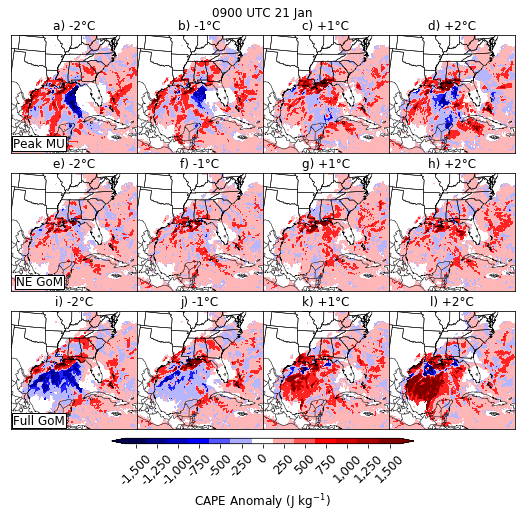

In [28]:
vmin=-1500
vmax=1500

cmap = plt.cm.get_cmap('seismic', 8)

levels = [-1500,-1250,-1000,-750,-500,-250,0,250,500,750,1000,1250,1500]

#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(7.,6.))

#fig.suptitle(f'{time}', x=0, y=1.0, fontsize=12)

fig.suptitle(f'0900 UTC 21 Jan', x=0.5, y=1.0275, fontsize=12)

a = u"\u00b0"

##############################################################################  


ax1 = fig.add_axes([0.0, 0.66, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12)

ax1.text(0.225, 0.075, 'Peak MU', fontsize=12, 
         horizontalalignment='center', verticalalignment='center', 
         transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', pad=1.0))

wspd_contours = bm.contourf(x, y, to_np(dbz1_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:], 
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax2 = fig.add_axes([0.25, 0.66, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz2_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax3 = fig.add_axes([0.5, 0.66, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz3_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax4 = fig.add_axes([0.75, 0.66, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz4_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax5 = fig.add_axes([0., 0.34, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

ax5.text(0.225, 0.075, 'NE GoM', fontsize=12, 
         horizontalalignment='center', verticalalignment='center', 
         transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', pad=1.0))

wspd_contours = bm.contourf(x, y, to_np(dbz5_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax6 = fig.add_axes([0.25, 0.34, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz6_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax7 = fig.add_axes([0.5, 0.34, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz7_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax8 = fig.add_axes([0.75, 0.34, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz8_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax9 = fig.add_axes([0., 0.02, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)

ax9.text(0.225, 0.075, 'Full GoM', fontsize=12,
         horizontalalignment='center', verticalalignment='center', 
         transform=ax9.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', pad=1.0))

wspd_contours = bm.contourf(x, y, to_np(dbz9_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates() 


##############################################################################  


ax10 = fig.add_axes([0.25, 0.02, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz10_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax11 = fig.add_axes([0.5, 0.02, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz11_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


ax12 = fig.add_axes([0.75, 0.02, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

wspd_contours = bm.contourf(x, y, to_np(dbz12_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                            levels=levels,
                            cmap=cmap, extend='both')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()


##############################################################################  


#ax13 = fig.add_axes([-0.09, 0.811, 0.15, 0.15])

#ax13.text(0., 0., "Control Run", fontsize=10, zorder=40, transform=ax13.transAxes,
#         bbox={'facecolor':'w', 'pad':1})

#wspd_contours = bm.pcolormesh(x, y, to_np(dbz_wrf_d02)[:,:],
#                              cmap=cmap, vmin=vmin, vmax=vmax, zorder=30)

#bm.drawcoastlines(linewidth=0.5, zorder=40)
#bm.drawcountries(zorder=40)
#bm.drawstates(zorder=40)

##############################################################################  


import matplotlib as mpl

cbar_ax = fig.add_axes([0.2, 0.015, 0.6, 0.0125])

cmap = plt.cm.get_cmap('seismic', 13)

norm = mpl.colors.Normalize(vmin=0, vmax=13)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],
                                extend='both')

cb1.set_label('CAPE Anomaly (J kg$^{-1}$)', fontsize=12)

labels = np.arange(0,13,1)
loc    = labels + .5
cb1.set_ticks(loc)

cb1.ax.set_xticklabels(['-1,500','-1,250','-1,000','-750','-500','-250','0',
                        '250','500','750','1,000','1,250','1,500'],rotation=45)

cb1.ax.tick_params(labelsize=12)


##############################################################################  


plt.savefig(f'/glade/work/molina/DATA/temp_figs/mwr2019_fig13.png', bbox_inches='tight', pad_inches=0.075, dpi=1200)
plt.savefig(f'/glade/work/molina/DATA/temp_figs/mwr2019_fig13_lowdpi.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
plt.show()
plt.close()


##############################################################################  
##############################################################################  
##############################################################################  

WRF File Opened...
WRF File1 Opened...
WRF File2 Opened...
WRF File3 Opened...
WRF File4 Opened...
WRF File5 Opened...
WRF File6 Opened...
WRF File7 Opened...
WRF File8 Opened...
WRF File9 Opened...
WRF File10 Opened...
WRF File11 Opened...
WRF File12 Opened...


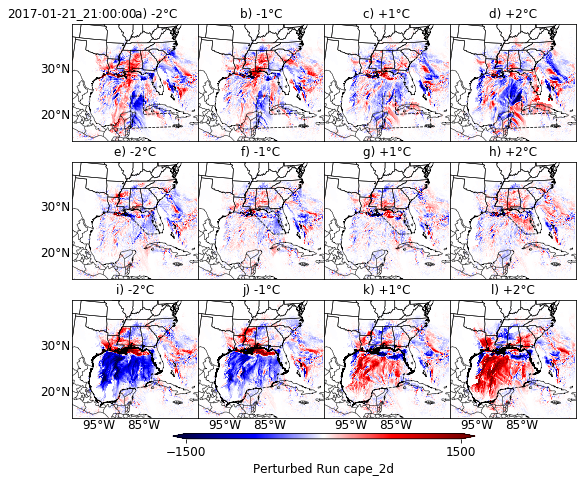

In [6]:
###AVAILABLE VARIABLES
#td2	2m Dew Point Temperature
#slp	Sea Level Pressure
#rh2	2m Relative Humidity
#helicity	Storm Relative Helicity
#eth/theta_e	Equivalent Potential Temperature
#cape_2d	2D CAPE (MCAPE/MCIN/LCL/LFC)


####################################################################################

var = "cape_2d"
vmin = -1500
vmax = 1500
time = "2017-01-21_21:00:00"
cmap = 'seismic'

####################################################################################


#orig
ncfile_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_{time}")

while True:
    dbz_wrf_d02 = np.array([0])
    if len(dbz_wrf_d02) == 1:
        try: 
            dbz_wrf_d02 = getvar(ncfile_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz_wrf_d02) != 1:
        print('WRF File Opened...')
        break


#perturb
ncfile1_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_cool_2/wrfout_d01_{time}")

while True:
    dbz1_wrf_d02 = np.array([0])
    if len(dbz1_wrf_d02) == 1:
        try: 
            dbz1_wrf_d02 = getvar(ncfile1_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz1_wrf_d02) != 1:
        print('WRF File1 Opened...')
        break


ncfile2_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_cool_1/wrfout_d01_{time}")

while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('WRF File2 Opened...')
        break
    
    
ncfile3_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_1/wrfout_d01_{time}")

while True:
    dbz3_wrf_d02 = np.array([0])
    if len(dbz3_wrf_d02) == 1:
        try: 
            dbz3_wrf_d02 = getvar(ncfile3_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz3_wrf_d02) != 1:
        print('WRF File3 Opened...')
        break

    
ncfile4_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_2/wrfout_d01_{time}")

while True:
    dbz4_wrf_d02 = np.array([0])
    if len(dbz4_wrf_d02) == 1:
        try: 
            dbz4_wrf_d02 = getvar(ncfile4_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz4_wrf_d02) != 1:
        print('WRF File4 Opened...')
        break
    
    
ncfile5_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_2/wrfout_d01_{time}")

while True:
    dbz5_wrf_d02 = np.array([0])
    if len(dbz5_wrf_d02) == 1:
        try: 
            dbz5_wrf_d02 = getvar(ncfile5_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz5_wrf_d02) != 1:
        print('WRF File5 Opened...')
        break
    
    
ncfile6_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_1/wrfout_d01_{time}")

while True:
    dbz6_wrf_d02 = np.array([0])
    if len(dbz6_wrf_d02) == 1:
        try: 
            dbz6_wrf_d02 = getvar(ncfile6_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz6_wrf_d02) != 1:
        print('WRF File6 Opened...')
        break


ncfile7_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_1/wrfout_d01_{time}")

while True:
    dbz7_wrf_d02 = np.array([0])
    if len(dbz7_wrf_d02) == 1:
        try: 
            dbz7_wrf_d02 = getvar(ncfile7_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz7_wrf_d02) != 1:
        print('WRF File7 Opened...')
        break
    

ncfile8_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_2/wrfout_d01_{time}")

while True:
    dbz8_wrf_d02 = np.array([0])
    if len(dbz8_wrf_d02) == 1:
        try: 
            dbz8_wrf_d02 = getvar(ncfile8_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz8_wrf_d02) != 1:
        print('WRF File8 Opened...')
        break
    

ncfile9_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_2/wrfout_d01_{time}")

while True:
    dbz9_wrf_d02 = np.array([0])
    if len(dbz9_wrf_d02) == 1:
        try: 
            dbz9_wrf_d02 = getvar(ncfile9_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz9_wrf_d02) != 1:
        print('WRF File9 Opened...')
        break
        
        
ncfile10_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_1/wrfout_d01_{time}")

while True:
    dbz10_wrf_d02 = np.array([0])
    if len(dbz10_wrf_d02) == 1:
        try: 
            dbz10_wrf_d02 = getvar(ncfile10_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz10_wrf_d02) != 1:
        print('WRF File10 Opened...')
        break
        
        
ncfile11_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_1/wrfout_d01_{time}")

while True:
    dbz11_wrf_d02 = np.array([0])
    if len(dbz11_wrf_d02) == 1:
        try: 
            dbz11_wrf_d02 = getvar(ncfile11_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz11_wrf_d02) != 1:
        print('WRF File11 Opened...')
        break
        
        
ncfile12_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_2/wrfout_d01_{time}")

while True:
    dbz12_wrf_d02 = np.array([0])
    if len(dbz12_wrf_d02) == 1:
        try: 
            dbz12_wrf_d02 = getvar(ncfile12_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz12_wrf_d02) != 1:
        print('WRF File12 Opened...')
        break
        
        
#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(7.,6.))

fig.suptitle(f'{time}', x=0, y=1.0, fontsize=12)

a = u"\u00b0"

##############################################################################  


ax1 = fig.add_axes([0.0, 0.66, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12, ha='left')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.pcolormesh(x, y, to_np(dbz1_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax1.add_patch(patch_mu)


##############################################################################  


ax2 = fig.add_axes([0.25, 0.66, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz2_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax2.add_patch(patch_mu)


##############################################################################  


ax3 = fig.add_axes([0.5, 0.66, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz3_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax3.add_patch(patch_mu)


##############################################################################  


ax4 = fig.add_axes([0.75, 0.66, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz4_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax4.add_patch(patch_mu)


##############################################################################  


ax5 = fig.add_axes([0., 0.34, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.pcolormesh(x, y, to_np(dbz5_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax5.add_patch(patch_plume)


##############################################################################  


ax6 = fig.add_axes([0.25, 0.34, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz6_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax6.add_patch(patch_plume)


##############################################################################  


ax7 = fig.add_axes([0.5, 0.34, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz7_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax7.add_patch(patch_plume)


##############################################################################  


ax8 = fig.add_axes([0.75, 0.34, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz8_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax8.add_patch(patch_plume)


##############################################################################  


ax9 = fig.add_axes([0., 0.02, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)   

wspd_contours = bm.pcolormesh(x, y, to_np(dbz9_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax9.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax10 = fig.add_axes([0.25, 0.02, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz10_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax10.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax11 = fig.add_axes([0.5, 0.02, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz11_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax11.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax12 = fig.add_axes([0.75, 0.02, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz12_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax12.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


#ax13 = fig.add_axes([-0.09, 0.811, 0.15, 0.15])

#ax13.text(0., 0., "Control Run", fontsize=10, zorder=40, transform=ax13.transAxes,
#         bbox={'facecolor':'w', 'pad':1})

#wspd_contours = bm.pcolormesh(x, y, to_np(dbz_wrf_d02)[:,:],
#                              cmap=cmap, vmin=vmin, vmax=vmax, zorder=30)

#bm.drawcoastlines(linewidth=0.5, zorder=40)
#bm.drawcountries(zorder=40)
#bm.drawstates(zorder=40)

##############################################################################  


cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.0125])

tickss = [vmin, vmax]
cbar = fig.colorbar(wspd_contours, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
#cbar.ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(f'Perturbed Run {var}', fontsize=12)


##############################################################################  


plt.savefig(f'mwr2019_{time[:10]}_{time[11:13]}_{var}.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
#plt.close()

plt.show()

##############################################################################  
##############################################################################  
##############################################################################  

WRF File Opened...
WRF File1 Opened...
WRF File2 Opened...
WRF File3 Opened...
WRF File4 Opened...
WRF File5 Opened...
WRF File6 Opened...
WRF File7 Opened...
WRF File8 Opened...
WRF File9 Opened...
WRF File10 Opened...
WRF File11 Opened...
WRF File12 Opened...


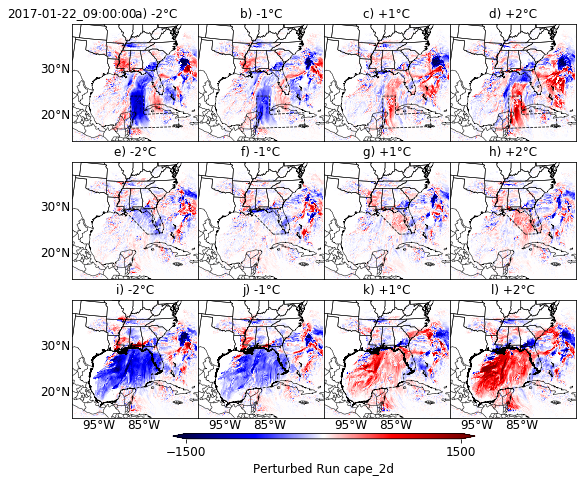

In [7]:
###AVAILABLE VARIABLES
#td2	2m Dew Point Temperature
#slp	Sea Level Pressure
#rh2	2m Relative Humidity
#helicity	Storm Relative Helicity
#eth/theta_e	Equivalent Potential Temperature
#cape_2d	2D CAPE (MCAPE/MCIN/LCL/LFC)


####################################################################################

var = "cape_2d"
vmin = -1500
vmax = 1500
time = "2017-01-22_09:00:00"
cmap = 'seismic'

####################################################################################


#orig
ncfile_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_{time}")

while True:
    dbz_wrf_d02 = np.array([0])
    if len(dbz_wrf_d02) == 1:
        try: 
            dbz_wrf_d02 = getvar(ncfile_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz_wrf_d02) != 1:
        print('WRF File Opened...')
        break


#perturb
ncfile1_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_cool_2/wrfout_d01_{time}")

while True:
    dbz1_wrf_d02 = np.array([0])
    if len(dbz1_wrf_d02) == 1:
        try: 
            dbz1_wrf_d02 = getvar(ncfile1_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz1_wrf_d02) != 1:
        print('WRF File1 Opened...')
        break


ncfile2_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_cool_1/wrfout_d01_{time}")

while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('WRF File2 Opened...')
        break
    
    
ncfile3_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_1/wrfout_d01_{time}")

while True:
    dbz3_wrf_d02 = np.array([0])
    if len(dbz3_wrf_d02) == 1:
        try: 
            dbz3_wrf_d02 = getvar(ncfile3_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz3_wrf_d02) != 1:
        print('WRF File3 Opened...')
        break

    
ncfile4_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_2/wrfout_d01_{time}")

while True:
    dbz4_wrf_d02 = np.array([0])
    if len(dbz4_wrf_d02) == 1:
        try: 
            dbz4_wrf_d02 = getvar(ncfile4_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz4_wrf_d02) != 1:
        print('WRF File4 Opened...')
        break
    
    
ncfile5_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_2/wrfout_d01_{time}")

while True:
    dbz5_wrf_d02 = np.array([0])
    if len(dbz5_wrf_d02) == 1:
        try: 
            dbz5_wrf_d02 = getvar(ncfile5_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz5_wrf_d02) != 1:
        print('WRF File5 Opened...')
        break
    
    
ncfile6_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_1/wrfout_d01_{time}")

while True:
    dbz6_wrf_d02 = np.array([0])
    if len(dbz6_wrf_d02) == 1:
        try: 
            dbz6_wrf_d02 = getvar(ncfile6_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz6_wrf_d02) != 1:
        print('WRF File6 Opened...')
        break


ncfile7_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_1/wrfout_d01_{time}")

while True:
    dbz7_wrf_d02 = np.array([0])
    if len(dbz7_wrf_d02) == 1:
        try: 
            dbz7_wrf_d02 = getvar(ncfile7_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz7_wrf_d02) != 1:
        print('WRF File7 Opened...')
        break
    

ncfile8_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_2/wrfout_d01_{time}")

while True:
    dbz8_wrf_d02 = np.array([0])
    if len(dbz8_wrf_d02) == 1:
        try: 
            dbz8_wrf_d02 = getvar(ncfile8_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz8_wrf_d02) != 1:
        print('WRF File8 Opened...')
        break
    

ncfile9_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_2/wrfout_d01_{time}")

while True:
    dbz9_wrf_d02 = np.array([0])
    if len(dbz9_wrf_d02) == 1:
        try: 
            dbz9_wrf_d02 = getvar(ncfile9_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz9_wrf_d02) != 1:
        print('WRF File9 Opened...')
        break
        
        
ncfile10_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_1/wrfout_d01_{time}")

while True:
    dbz10_wrf_d02 = np.array([0])
    if len(dbz10_wrf_d02) == 1:
        try: 
            dbz10_wrf_d02 = getvar(ncfile10_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz10_wrf_d02) != 1:
        print('WRF File10 Opened...')
        break
        
        
ncfile11_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_1/wrfout_d01_{time}")

while True:
    dbz11_wrf_d02 = np.array([0])
    if len(dbz11_wrf_d02) == 1:
        try: 
            dbz11_wrf_d02 = getvar(ncfile11_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz11_wrf_d02) != 1:
        print('WRF File11 Opened...')
        break
        
        
ncfile12_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_2/wrfout_d01_{time}")

while True:
    dbz12_wrf_d02 = np.array([0])
    if len(dbz12_wrf_d02) == 1:
        try: 
            dbz12_wrf_d02 = getvar(ncfile12_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz12_wrf_d02) != 1:
        print('WRF File12 Opened...')
        break
        
        
#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(7.,6.))

fig.suptitle(f'{time}', x=0, y=1.0, fontsize=12)

a = u"\u00b0"

##############################################################################  


ax1 = fig.add_axes([0.0, 0.66, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12, ha='left')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.pcolormesh(x, y, to_np(dbz1_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax1.add_patch(patch_mu)


##############################################################################  


ax2 = fig.add_axes([0.25, 0.66, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz2_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax2.add_patch(patch_mu)


##############################################################################  


ax3 = fig.add_axes([0.5, 0.66, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz3_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax3.add_patch(patch_mu)


##############################################################################  


ax4 = fig.add_axes([0.75, 0.66, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz4_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax4.add_patch(patch_mu)


##############################################################################  


ax5 = fig.add_axes([0., 0.34, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.pcolormesh(x, y, to_np(dbz5_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax5.add_patch(patch_plume)


##############################################################################  


ax6 = fig.add_axes([0.25, 0.34, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz6_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax6.add_patch(patch_plume)


##############################################################################  


ax7 = fig.add_axes([0.5, 0.34, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz7_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax7.add_patch(patch_plume)


##############################################################################  


ax8 = fig.add_axes([0.75, 0.34, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz8_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax8.add_patch(patch_plume)


##############################################################################  


ax9 = fig.add_axes([0., 0.02, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)   

wspd_contours = bm.pcolormesh(x, y, to_np(dbz9_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax9.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax10 = fig.add_axes([0.25, 0.02, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz10_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax10.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax11 = fig.add_axes([0.5, 0.02, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz11_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax11.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax12 = fig.add_axes([0.75, 0.02, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz12_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax12.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


#ax13 = fig.add_axes([-0.09, 0.811, 0.15, 0.15])

#ax13.text(0., 0., "Control Run", fontsize=10, zorder=40, transform=ax13.transAxes,
#         bbox={'facecolor':'w', 'pad':1})

#wspd_contours = bm.pcolormesh(x, y, to_np(dbz_wrf_d02)[:,:],
#                              cmap=cmap, vmin=vmin, vmax=vmax, zorder=30)

#bm.drawcoastlines(linewidth=0.5, zorder=40)
#bm.drawcountries(zorder=40)
#bm.drawstates(zorder=40)

##############################################################################  


cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.0125])

tickss = [vmin, vmax]
cbar = fig.colorbar(wspd_contours, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
#cbar.ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(f'Perturbed Run {var}', fontsize=12)


##############################################################################  


plt.savefig(f'mwr2019_{time[:10]}_{time[11:13]}_{var}.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
#plt.close()

plt.show()

##############################################################################  
##############################################################################  
##############################################################################  

WRF File Opened...
WRF File1 Opened...
WRF File2 Opened...
WRF File3 Opened...
WRF File4 Opened...
WRF File5 Opened...
WRF File6 Opened...
WRF File7 Opened...
WRF File8 Opened...
WRF File9 Opened...
WRF File10 Opened...
WRF File11 Opened...
WRF File12 Opened...


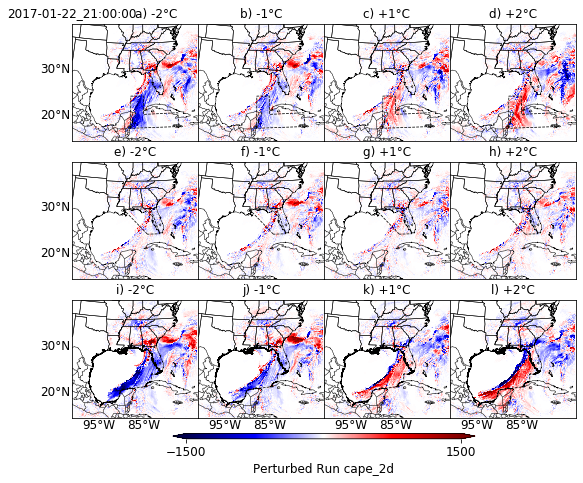

In [8]:
###AVAILABLE VARIABLES
#td2	2m Dew Point Temperature
#slp	Sea Level Pressure
#rh2	2m Relative Humidity
#helicity	Storm Relative Helicity
#eth/theta_e	Equivalent Potential Temperature
#cape_2d	2D CAPE (MCAPE/MCIN/LCL/LFC)


####################################################################################

var = "cape_2d"
vmin = -1500
vmax = 1500
time = "2017-01-22_21:00:00"
cmap = 'seismic'

####################################################################################


#orig
ncfile_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_{time}")

while True:
    dbz_wrf_d02 = np.array([0])
    if len(dbz_wrf_d02) == 1:
        try: 
            dbz_wrf_d02 = getvar(ncfile_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz_wrf_d02) != 1:
        print('WRF File Opened...')
        break


#perturb
ncfile1_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_cool_2/wrfout_d01_{time}")

while True:
    dbz1_wrf_d02 = np.array([0])
    if len(dbz1_wrf_d02) == 1:
        try: 
            dbz1_wrf_d02 = getvar(ncfile1_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz1_wrf_d02) != 1:
        print('WRF File1 Opened...')
        break


ncfile2_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_cool_1/wrfout_d01_{time}")

while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('WRF File2 Opened...')
        break
    
    
ncfile3_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_1/wrfout_d01_{time}")

while True:
    dbz3_wrf_d02 = np.array([0])
    if len(dbz3_wrf_d02) == 1:
        try: 
            dbz3_wrf_d02 = getvar(ncfile3_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz3_wrf_d02) != 1:
        print('WRF File3 Opened...')
        break

    
ncfile4_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_2/wrfout_d01_{time}")

while True:
    dbz4_wrf_d02 = np.array([0])
    if len(dbz4_wrf_d02) == 1:
        try: 
            dbz4_wrf_d02 = getvar(ncfile4_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz4_wrf_d02) != 1:
        print('WRF File4 Opened...')
        break
    
    
ncfile5_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_2/wrfout_d01_{time}")

while True:
    dbz5_wrf_d02 = np.array([0])
    if len(dbz5_wrf_d02) == 1:
        try: 
            dbz5_wrf_d02 = getvar(ncfile5_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz5_wrf_d02) != 1:
        print('WRF File5 Opened...')
        break
    
    
ncfile6_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_1/wrfout_d01_{time}")

while True:
    dbz6_wrf_d02 = np.array([0])
    if len(dbz6_wrf_d02) == 1:
        try: 
            dbz6_wrf_d02 = getvar(ncfile6_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz6_wrf_d02) != 1:
        print('WRF File6 Opened...')
        break


ncfile7_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_1/wrfout_d01_{time}")

while True:
    dbz7_wrf_d02 = np.array([0])
    if len(dbz7_wrf_d02) == 1:
        try: 
            dbz7_wrf_d02 = getvar(ncfile7_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz7_wrf_d02) != 1:
        print('WRF File7 Opened...')
        break
    

ncfile8_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_2/wrfout_d01_{time}")

while True:
    dbz8_wrf_d02 = np.array([0])
    if len(dbz8_wrf_d02) == 1:
        try: 
            dbz8_wrf_d02 = getvar(ncfile8_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz8_wrf_d02) != 1:
        print('WRF File8 Opened...')
        break
    

ncfile9_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_2/wrfout_d01_{time}")

while True:
    dbz9_wrf_d02 = np.array([0])
    if len(dbz9_wrf_d02) == 1:
        try: 
            dbz9_wrf_d02 = getvar(ncfile9_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz9_wrf_d02) != 1:
        print('WRF File9 Opened...')
        break
        
        
ncfile10_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_1/wrfout_d01_{time}")

while True:
    dbz10_wrf_d02 = np.array([0])
    if len(dbz10_wrf_d02) == 1:
        try: 
            dbz10_wrf_d02 = getvar(ncfile10_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz10_wrf_d02) != 1:
        print('WRF File10 Opened...')
        break
        
        
ncfile11_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_1/wrfout_d01_{time}")

while True:
    dbz11_wrf_d02 = np.array([0])
    if len(dbz11_wrf_d02) == 1:
        try: 
            dbz11_wrf_d02 = getvar(ncfile11_wrf_d02, var, meta=False)
        except ValueError:
            continue
    if len(dbz11_wrf_d02) != 1:
        print('WRF File11 Opened...')
        break
        
        
ncfile12_wrf_d02 = Dataset(f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_2/wrfout_d01_{time}")

while True:
    dbz12_wrf_d02 = np.array([0])
    if len(dbz12_wrf_d02) == 1:
        try: 
            dbz12_wrf_d02 = getvar(ncfile12_wrf_d02, var,meta=False)
        except ValueError:
            continue
    if len(dbz12_wrf_d02) != 1:
        print('WRF File12 Opened...')
        break
        
        
#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(7.,6.))

fig.suptitle(f'{time}', x=0, y=1.0, fontsize=12)

a = u"\u00b0"

##############################################################################  


ax1 = fig.add_axes([0.0, 0.66, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12, ha='left')

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.pcolormesh(x, y, to_np(dbz1_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax1.add_patch(patch_mu)


##############################################################################  


ax2 = fig.add_axes([0.25, 0.66, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz2_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax2.add_patch(patch_mu)


##############################################################################  


ax3 = fig.add_axes([0.5, 0.66, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz3_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax3.add_patch(patch_mu)


##############################################################################  


ax4 = fig.add_axes([0.75, 0.66, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz4_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax4.add_patch(patch_mu)


##############################################################################  


ax5 = fig.add_axes([0., 0.34, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = bm.pcolormesh(x, y, to_np(dbz5_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax5.add_patch(patch_plume)


##############################################################################  


ax6 = fig.add_axes([0.25, 0.34, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz6_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax6.add_patch(patch_plume)


##############################################################################  


ax7 = fig.add_axes([0.5, 0.34, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz7_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax7.add_patch(patch_plume)


##############################################################################  


ax8 = fig.add_axes([0.75, 0.34, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()

wspd_contours = bm.pcolormesh(x, y, to_np(dbz8_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.)
ax8.add_patch(patch_plume)


##############################################################################  


ax9 = fig.add_axes([0., 0.02, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)   

wspd_contours = bm.pcolormesh(x, y, to_np(dbz9_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax9.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax10 = fig.add_axes([0.25, 0.02, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz10_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax10.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax11 = fig.add_axes([0.5, 0.02, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz11_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax11.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


ax12 = fig.add_axes([0.75, 0.02, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = bm.pcolormesh(x, y, to_np(dbz12_wrf_d02)[0,:,:]-to_np(dbz_wrf_d02)[0,:,:],
                              cmap=cmap, vmin=vmin, vmax=vmax)

ax12.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='k', ls='--', lw=0.75, alpha=1.))


##############################################################################  


#ax13 = fig.add_axes([-0.09, 0.811, 0.15, 0.15])

#ax13.text(0., 0., "Control Run", fontsize=10, zorder=40, transform=ax13.transAxes,
#         bbox={'facecolor':'w', 'pad':1})

#wspd_contours = bm.pcolormesh(x, y, to_np(dbz_wrf_d02)[:,:],
#                              cmap=cmap, vmin=vmin, vmax=vmax, zorder=30)

#bm.drawcoastlines(linewidth=0.5, zorder=40)
#bm.drawcountries(zorder=40)
#bm.drawstates(zorder=40)

##############################################################################  


cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.0125])

tickss = [vmin, vmax]
cbar = fig.colorbar(wspd_contours, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
#cbar.ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(f'Perturbed Run {var}', fontsize=12)


##############################################################################  


plt.savefig(f'mwr2019_{time[:10]}_{time[11:13]}_{var}.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
#plt.close()

plt.show()

##############################################################################  
##############################################################################  
##############################################################################  

'21'